In [ ]:
import nengo

model = nengo.Network()
with model:
    stim = nengo.Node([0])
    
    sensory = nengo.Ensemble(n_neurons=100, dimensions=2)
    
    spatial = nengo.Ensemble(n_neurons=100, dimensions=2)
    
    c = nengo.Connection(sensory, spatial, learning_rule_type=nengo.PES())
        
    error = nengo.Ensemble(n_neurons=100, dimensions=2)
    nengo.Connection(error, c.learning_rule)
    
    nengo.Connection(spatial, error)
    correct = nengo.Node([0,0])
    nengo.Connection(correct, error, transform=-1)

In [11]:
import nengo
import numpy as np

model = nengo.Network()
with model:
    stim = nengo.Node([0])
    
    sensory = nengo.Ensemble(n_neurons=100, dimensions=2, intercepts=nengo.dists.Uniform(0.7,0.95))
    
    spatial = nengo.Ensemble(n_neurons=100, dimensions=2, intercepts=nengo.dists.Uniform(0.7,0.95))
    
    nengo.Connection(stim, sensory, function=lambda x: (np.sin(x*2), np.cos(x*2)))
    nengo.Connection(sensory, spatial)


In [12]:
import nengo_gui.ipython
nengo_gui.ipython.IPythonViz(model)

In [21]:
import nengo
import numpy as np

def run_sim(input_value=0):
    model = nengo.Network(seed=3)
    with model:
        stim = nengo.Node([input_value])

        sensory = nengo.Ensemble(n_neurons=100, dimensions=2, intercepts=nengo.dists.Uniform(0.7,0.95))

        spatial = nengo.Ensemble(n_neurons=100, dimensions=2, intercepts=nengo.dists.Uniform(0.7,0.95))

        nengo.Connection(stim, sensory, function=lambda x: (np.sin(x*2), np.cos(x*2)))
        nengo.Connection(sensory, spatial)
        #def rotate(x):
        #    theta = np.arctan2(x[1], x[0])
        #    theta += 0.1
        #    return np.sin(theta), np.cos(theta)
        #nengo.Connection(sensory, spatial, function=rotate)

        sensory_probe = nengo.Probe(sensory.neurons)
        spatial_probe = nengo.Probe(spatial.neurons)
    
    sim = nengo.Simulator(model)
    with sim:
        sim.run(1)
    return np.mean(sim.data[spatial_probe], axis=0)


In [26]:
values = np.linspace(-1,1, 25)
rates = []
for v in values:
    print v
    rates.append(run_sim(v))
    


In [27]:
rates = np.array(rates)
%matplotlib inline

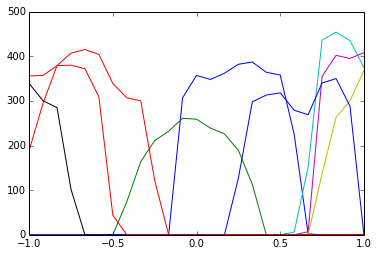

In [30]:
import pylab
for i in range(10,20):
    pylab.plot(values, rates[:,i])